The compnay wants to launch/update some features aimed at enhancing user engagement and improving financial literacy. 

These features aim to provide users with personalized financial recommendations and educational content as they navigate through the app.
One of the updated features was the points game for the app, users could get points from playing the game, the points could be as the money in this app services.

To evaluate the impact of the new game on user engagement and retention within the financial services application. 
The focus lies in determining whether the launching of the updated game significantly improves user retention compared to the original old game 

In [1]:
!pip3 install pandas
!pip3 install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Bessie Xu\AppData\Local\Temp\ipykernel_29344\1413168796.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# import datasets, 
df=pd.read_csv("D:\\Studying\\AB Testing\\Data source\\points_game.csv")

In [4]:
df.info()
# get an overview of the dataset, check the null 
# version: old (old game); new (new updated game)
# sum_rounds: the game played rounds during the 1st week 
# retention_7: is that the user go back on the 7 days to played the game, 1 for yes, 0 for no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userid        90189 non-null  int64 
 1   version       90189 non-null  object
 2   sum_rounds    90189 non-null  int64 
 3   retention_7   90189 non-null  int64 
 4   retention_30  90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


the data is good, non-null data

In [5]:
df['userid'].value_counts().sort_values(ascending=False).head()

userid
116      1
76598    1
377      1
483      1
488      1
Name: count, dtype: int64

Also no duplicate data

# Checking data base info (especially for the new version data)

In [6]:
df.groupby('version').count() ## count the number of users in each group

,userid,sum_rounds,retention_7,retention_30
version,,,,
new,44700,44700,44700,44700
old,45489,45489,45489,45489


users were randomly assigned to eith old or new version;

<Axes: >

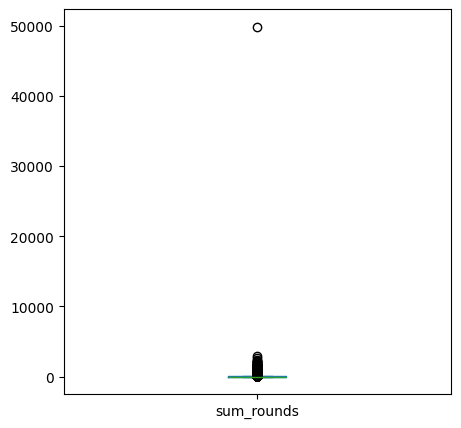

In [7]:
# for the old version:
df['sum_rounds'].plot.box(figsize=(5,5))

There is an oulier, the user played the points game 5000 rounds in a week. 
Due to the outlier, the boxplot is extremely skewed and not infomative. Check the percentile

In [8]:
df['sum_rounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_rounds, dtype: float64

50% users played the game fewer than 16 rounds weekly,
75% users played fewer than 51 rounds a week
From the percentile info, couldn't found out wheater the launch of the new game would helpful with users engagement and retention.

In [10]:
plot_df = df.groupby('sum_rounds')['userid'].count()
#counting the number of users for each number of game rounds
plot_df

sum_rounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

3994 new version users did not play the new points game once, either the old or the new one
Possible reasons: 
1. the points game not attract them;
2. our app services/products not attract them, the accumulated points  of the app not attractive;
3. they didn't like the game design/inteface etc.;
4. have not start to play or take a look for the new game.

More than 9000 users played the game fewer than 3 times a week, the possible reasons: 
1. did not like the pointed game; 
2. the game turned out to be different from what they expected; 

Text(0.5, 0, 'Number of rounds')

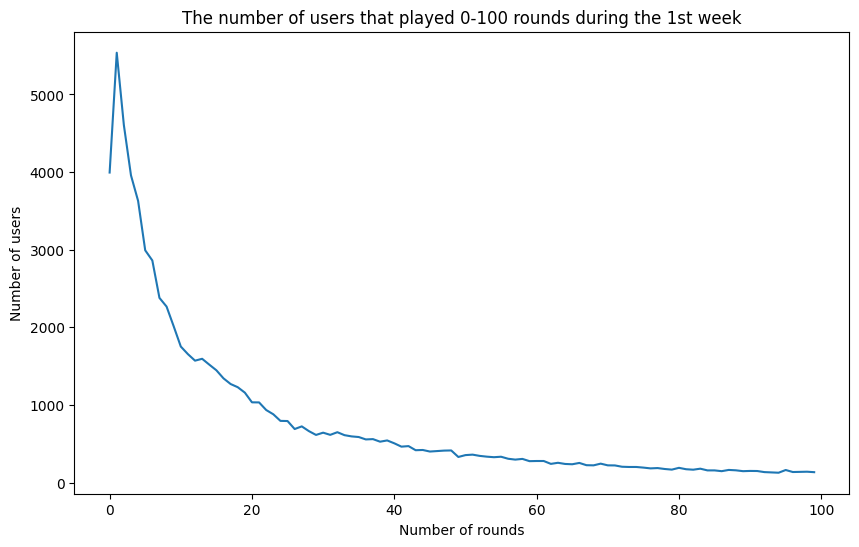

In [16]:
# plot the distribution of new version users that played 0-100 times during first week
%matplotlib inline

ax=plot_df[:100].plot(figsize = (10,6))
ax.set_title("The number of users that played 0-100 rounds during the 1st week")
ax.set_ylabel("Number of users")
ax.set_xlabel("Number of rounds")

The distribution is highly skewed with right tail.
Lots of users played few than 20 rounds in one week, as a points game, it's good.

# Comparing 7-days retention!!
The higher retention rate, the easier to retain users stay and use the application.

In [18]:
# calculate 7-day retention rate
df['retention_7'].sum()/df['retention_7'].count()
df['retention_7'].mean()

0.4452095044850259

In [14]:
# calculate 7-day retention rate for each group 
df.groupby('version')['retention_7'].mean()

version
new    0.448188
old    0.442283
Name: retention_7, dtype: float64

The new game 7-day retention rate is slightly higher than the old game 

# Comparing 30-days retention!!

In [17]:
df.groupby('version')['retention_30'].mean()

version
new    0.190201
old    0.182000
Name: retention_30, dtype: float64

The new game 30-day retention rate is also slightly higher than the old game 

# Applying Z-test

In [19]:
!pip3 install statsmodels
import statsmodels.api as sm


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Data set is large enough to use the Z-Test
Null Hypothesis: there is no difference in retention rate for old and new points game;
Alternative Hypothesis: the new game's retention rate is better than the old one (retention_rate_new > retention_rate_old)

In [28]:
# old game 7 day retention rate
retention_7_old = df[df.version=='old'].retention_7.mean()
n_old = len(df[df.version=='old'].retention_7)

# new game 7 day retention rate
retention_7_new = df[df.version=='new'].retention_7.mean()
n_new = len(df[df.version=="new"].retention_7)

retention_7_old, n_old, retention_7_new, n_new

(0.44228274967574577, 45489, 0.4481879194630872, 44700)

In [34]:
# test the 7-day retention
z_score_7, p_value_7 = sm.stats.proportions_ztest([retention_7_new, retention_7_old],[n_new,n_old], alternative='larger')

z_score_7, p_value_7

(0.014513747263446189, 0.49421005584445327)

In [35]:
# old game 30-days retention rate
retention_30_old = df[df.version=='old'].retention_30.mean()
# new game 30-days retention rate
retention_30_new = df[df.version=='new'].retention_30.mean()

retention_30_new, retention_30_old

(0.19020134228187918, 0.18200004396667327)

In [36]:
# test the 30-days retention
z_score_30, p_value_30 = sm.stats.proportions_ztest([retention_30_new, retention_30_old],[n_new,n_old], alternative='larger')

z_score_30, p_value_30

(0.018780864567321472, 0.49250795949737014)

Both 7-days & 30-days retention tests' p-value are larger than 0.05, the null hypothesis could not be rejected, thus the new points game could not help to get a higher retention rate for the app, it would be better to reconsider the points game strategy and do more marketing analysis to get users needs.